<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-10 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Simple AutoEncoders with Image Data </h2> </html>

Here is a simple autoencoder with just the dense layers.


Load the data and import the libraries.

In [1]:
# Your code to import matplotlib, pandas and numpy libraries

#
#
#
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

_______________________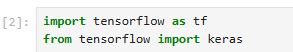

In [2]:
import tensorflow as tf
from tensorflow import keras

2025-03-27 14:23:15.229691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743085395.240337   17138 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743085395.243837   17138 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-27 14:23:15.256256: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print(tf.__version__)


2.18.1


__________________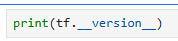

____________________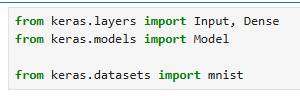

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [5]:
# Your code to load MNIST data and store it in variables x_train, x_test. 
# Note -  we do not need labels as it's autoencoder.

#
# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()





______________________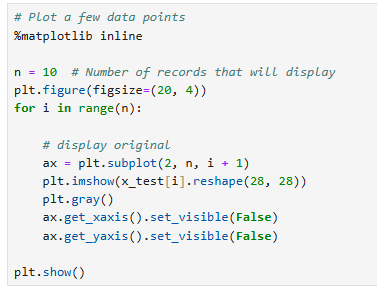

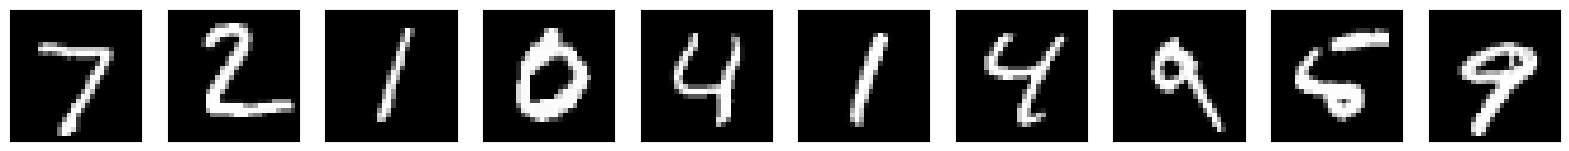

In [6]:
# Plot a few data points
%matplotlib inline

n = 10 # Number of records that will display
plt.figure(figsize=(20, 4))

for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  # Assuming x_test is loaded and preprocessed correctly in the missing section
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
# Your code to
# normalise train data - Divided by 255

#

# normalise test data - Divided by 255

#
# Convert data type to float32 for division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalise train data - Divided by 255
x_train = x_train / 255.0

# normalise test data - Divided by 255
x_test = x_test / 255.0

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


<html> <h3 style="font-style:italic; color:blue;"> Basic AutoEncoder : </h3> </html>

Build a basic symmetric encoder-decoder network that recreates the image.  
This network could be used in dimensionaliry reduction or feature learning. 


________________________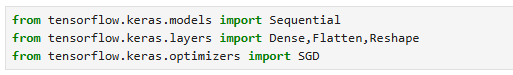

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [9]:

# Add as many layers in the Encoder network of your choice

#
#
#
#

# The last TWO layers of the Encoder and Decoder must be matched (see the following decoder cell)

#
#

encoder = Sequential(name="Encoder") 
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(Dense(128, activation='relu')) 
encoder.add(Dense(64, activation='relu'))  
encoder.add(Dense(25, activation='relu')) 



/home/calvin22580/anaconda3/envs/gpu_env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1743085397.827139   17138 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21770 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:04:00.0, compute capability: 8.6


In [10]:
# Your code to print your Encoder model

#
encoder.summary() 

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,361 (431.10 KB)

 Trainable params: 110,361 (431.10 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Your OWN Encoder model should be printed here 
# Please do not copy the model below

In [12]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

# Add as many layers in the Decoder as you want. 
# Reember - Encoder and Decoder must be symmetric.

decoder.add(Dense(128, activation='relu'))  # Hidden layer 1
decoder.add(Dense(256, activation='relu'))  # Added hidden layer 2
decoder.add(Dense(512, activation='relu'))  # Added hidden layer 3
#
#


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))


/home/calvin22580/anaconda3/envs/gpu_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Your code to print the Decoder model

decoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       402,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 574,628 (2.19 MB)

 Trainable params: 574,628 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Your OWN Decoder model should be printed here 
# Please do not copy the model below

____________________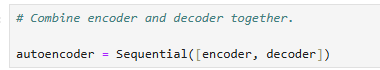

In [15]:
autoencoder = Sequential([encoder,decoder])

In [16]:
# Your code to print the Autoencoder model

autoencoder.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Encoder (Sequential)            │ (None, 25)             │       110,361 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 28, 28)         │       574,628 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,989 (2.61 MB)

 Trainable params: 684,989 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Your OWN Autoencoder model should be printed here 

In [18]:
#SGD?

In [19]:
# Your code to compile the Autoencoder. 
# Use binary_crossenropy as loss and metrics as accuracy.

#
from tensorflow.keras.optimizers import SGD

autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(learning_rate=0.1), # Using SGD as imported earlier, added a learning rate example
                    metrics=['accuracy'])

___________________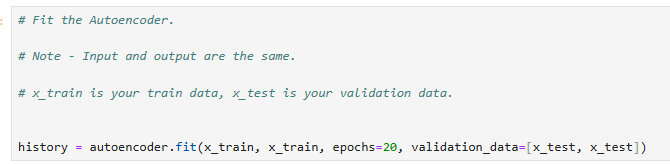

In [20]:
history = autoencoder.fit(x_train, x_train, epochs=40, validation_data=[x_test, x_test])

Epoch 1/40


I0000 00:00:1743085400.035431   17273 service.cc:148] XLA service 0x7f3b38008fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743085400.035470   17273 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-03-27 14:23:20.048055: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743085400.111141   17273 cuda_dnn.cc:529] Loaded cuDNN version 90800
2025-03-27 14:23:22.146583: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_404', 8 bytes spill stores, 8 bytes spill loads



  71/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0382 - loss: 0.6928    

I0000 00:00:1743085403.831455   17273 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0546 - loss: 0.4992 - val_accuracy: 0.0663 - val_loss: 0.2593
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0700 - loss: 0.2570 - val_accuracy: 0.0725 - val_loss: 0.2517
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0727 - loss: 0.2510 - val_accuracy: 0.0811 - val_loss: 0.2464
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0875 - loss: 0.2430 - val_accuracy: 0.1084 - val_loss: 0.2289
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1096 - loss: 0.2278 - val_accuracy: 0.1150 - val_loss: 0.2225
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1175 - loss: 0.2217 - val_accuracy: 0.1246 - val_loss: 0.2120
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1273 - loss: 0.2104 - val_accuracy: 0.1380 - val_loss: 0.2010
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1395 - loss: 0.1992 - val_accura

____________________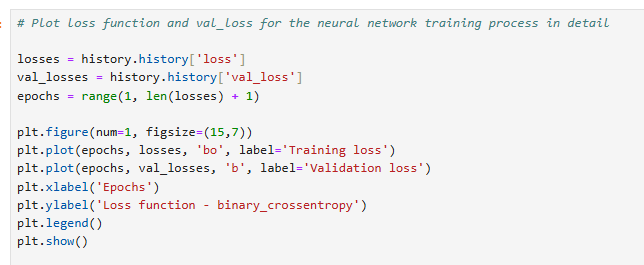

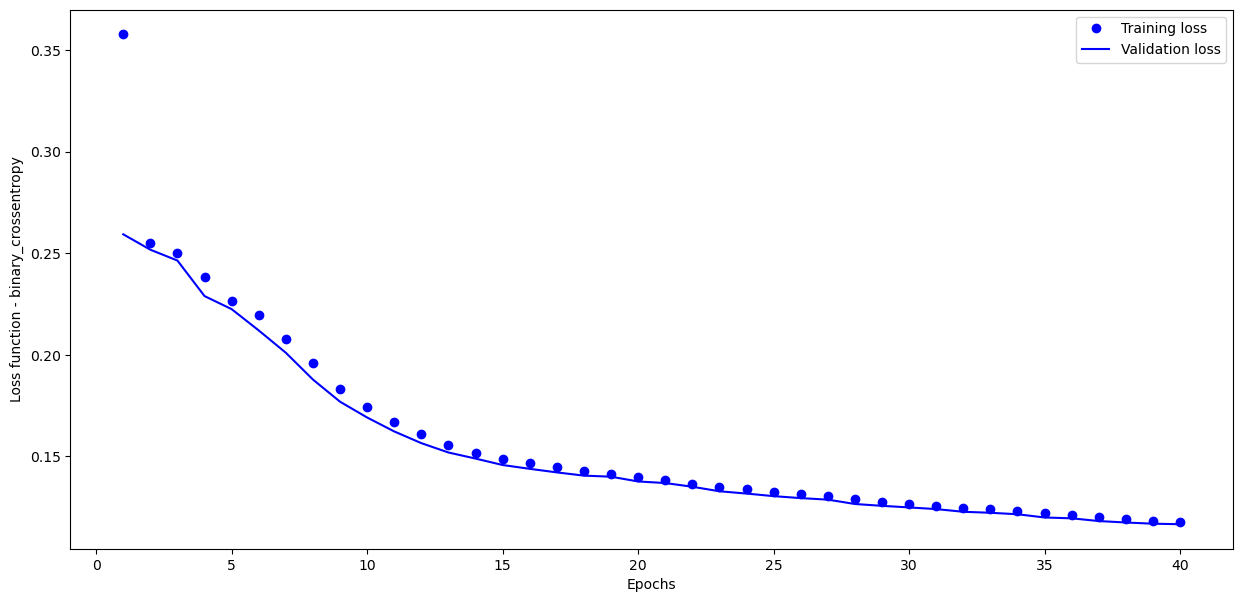

In [25]:
losses = history.history['loss']
val_losses = history.history['val_loss']
epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15, 7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

___________________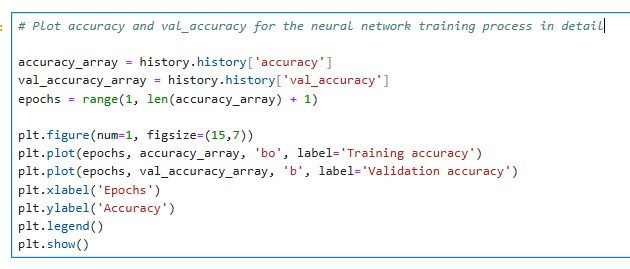

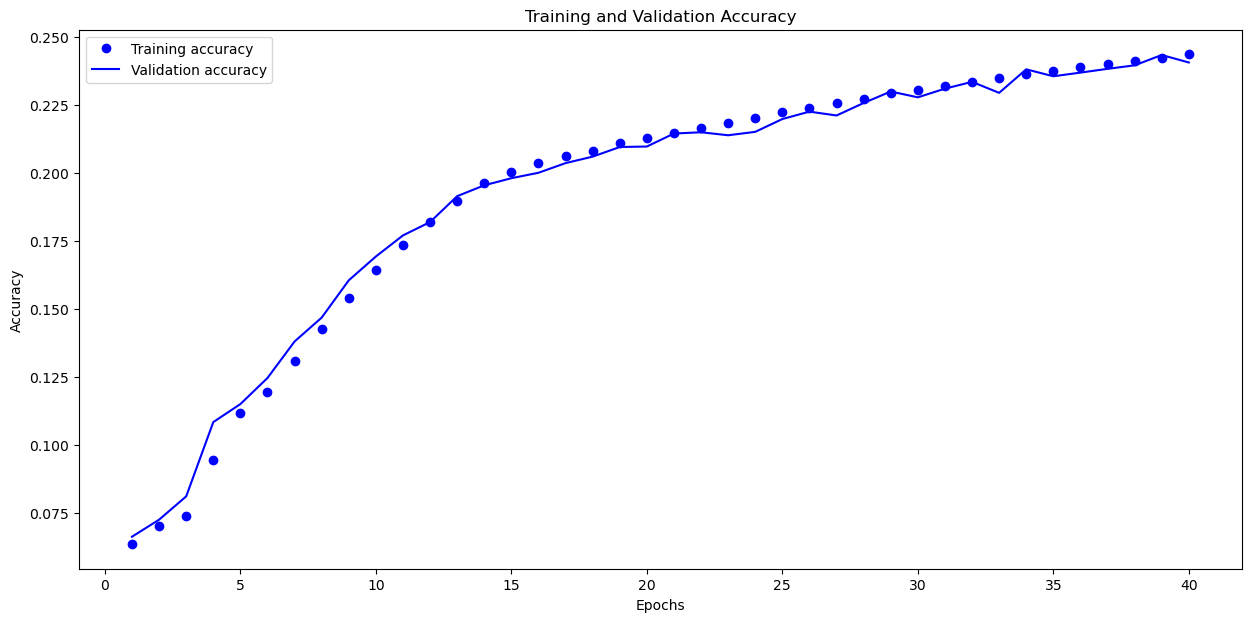

In [26]:
accuracy_array = history.history['accuracy']
val_accuracy_array = history.history['val_accuracy']
epochs = range(1, len(accuracy_array) + 1)
plt.figure(num=1, figsize=(15, 7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy') # Added a title for clarity
plt.legend()
plt.show()

_______________________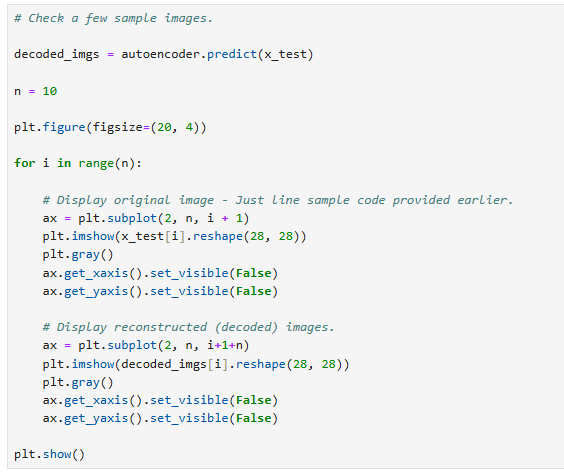

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step    


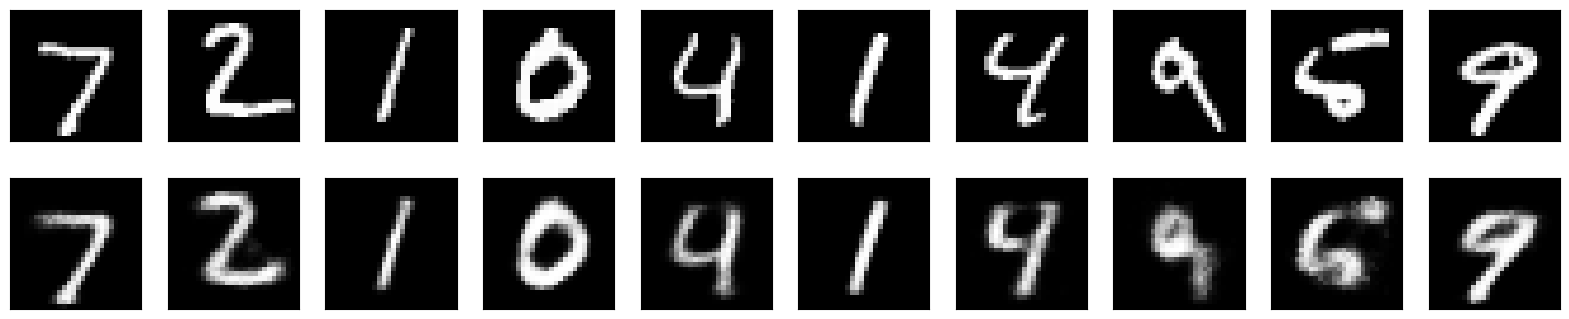

In [27]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


<html> <h3 style="font-style:italic; color:blue;"> AutoEncoders for Denoising Images : </h3> </html>

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 


______________________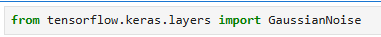

In [30]:
from tensorflow.keras.layers import GaussianNoise

In [22]:
#GaussianNoise?

___________________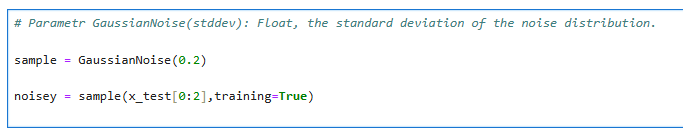

In [32]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2], training=True) 

In [23]:
# Plot the original and noisy images

_______________________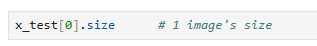

In [33]:
x_test[0].size

784

____________________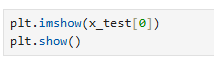

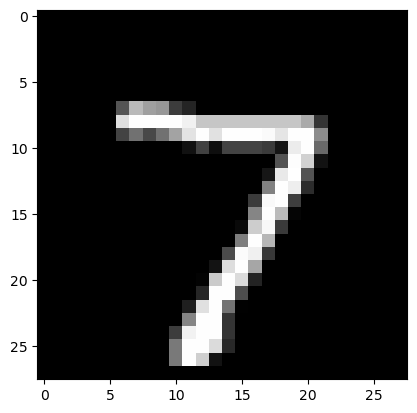

In [35]:
plt.imshow(x_test[0])
plt.show()

_____________________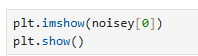

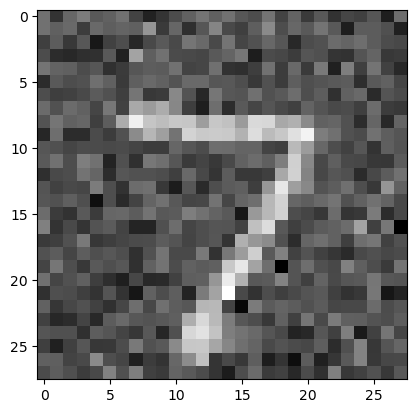

In [36]:
plt.imshow(noisey[0])
plt.show()

_________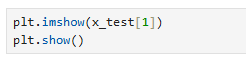

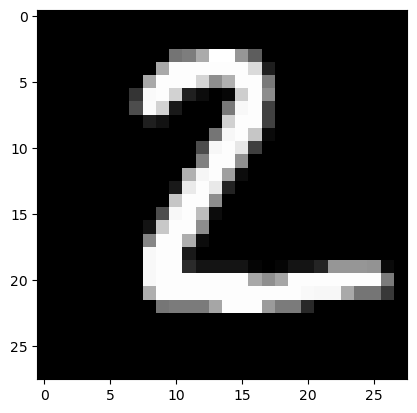

In [37]:
plt.imshow(x_test[1])
plt.show()

______________________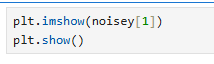

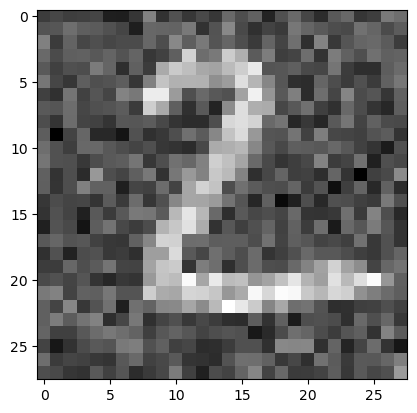

In [38]:
plt.imshow(noisey[1])
plt.show()

<html> <h4 style="font-style:italic; color:blue;"> Create a noise removal autoencoder and train it </h4> </html>

- Again similar to above it is a symmetric dense network. 
- Gaussian noise is added at the input so that the network sees noisy images and is able to map it to the clean outputs.


### Input - Images with noise
### Labels - Clean images.


In [40]:
encoder = Sequential(name="Denoising_Encoder")
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(GaussianNoise(0.2))

encoder.add(Dense(128, activation='relu'))
encoder.add(Dense(64, activation='relu'))  
encoder.add(Dense(25, activation='relu'))  



In [41]:
# Your OWN Encoder model should be printed here 
# Please do not copy the model below
print(encoder.summary())

Model: "Denoising_Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_3                │ (None, 784)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         1,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,361 (431.10 KB)

 Trainable params: 110,361 (431.10 KB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:

decoder = Sequential(name="Denoising_Decoder") 
decoder.add(Dense(50, input_shape=[25], activation='relu'))

decoder.add(Dense(128, activation='relu'))
decoder.add(Dense(256, activation='relu'))
decoder.add(Dense(512, activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

print(decoder.summary())

Model: "Denoising_Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 784)            │       402,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 574,628 (2.19 MB)

 Trainable params: 574,628 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Your OWN Decoder model should be printed here 
# Please do not copy the model below

_________________________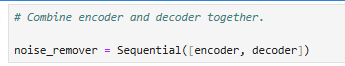

In [43]:
noise_remover = Sequential([encoder, decoder])

In [44]:
# Your code to print the Autoencoder model

#
noise_remover.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Denoising_Encoder (Sequential)  │ (None, 25)             │       110,361 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Denoising_Decoder (Sequential)  │ (None, 28, 28)         │       574,628 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,989 (2.61 MB)

 Trainable params: 684,989 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Your OWN Autoencoder model should be printed here 

In [45]:
noise_remover = Sequential([encoder, decoder])

noise_remover.compile(loss='binary_crossentropy',
                      optimizer=SGD(learning_rate=0.1), 
                      metrics=['accuracy'])


In [46]:
# Your code to fit 'noise_remover' model with the same parameters as earlier

# history_2 = ..........................
history_2 = autoencoder.fit(x_train, x_train, epochs=40, validation_data=[x_test, x_test])


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2450 - loss: 0.1170 - val_accuracy: 0.2432 - val_loss: 0.1159
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2459 - loss: 0.1163 - val_accuracy: 0.2457 - val_loss: 0.1148
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2465 - loss: 0.1156 - val_accuracy: 0.2462 - val_loss: 0.1144
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2461 - loss: 0.1156 - val_accuracy: 0.2465 - val_loss: 0.1140
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2492 - loss: 0.1145 - val_accuracy: 0.2411 - val_loss: 0.1134
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2493 - loss: 0.1141 - val_accuracy: 0.2461 - val_loss: 0.1131
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2505 - loss: 0.1132 - val_accuracy: 0.2474 - val_loss: 0.1121
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2519 - loss: 0.1132 - 

In [ ]:
# Hint: Use (copy and modify) the code from the cells above

___________________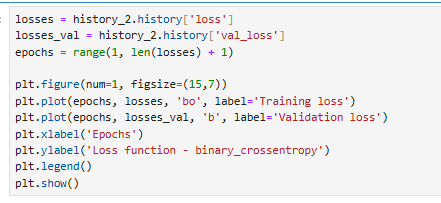

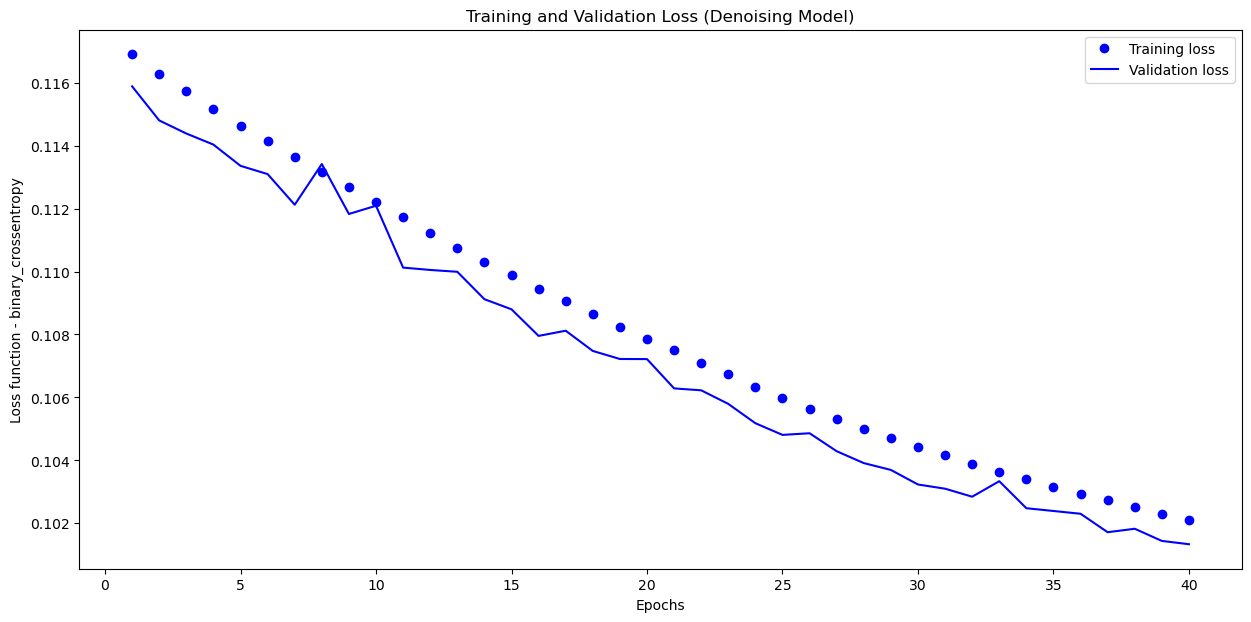

In [49]:
losses = history.history['loss']
losses_val = history.history['val_loss']

epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15, 7))

plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, losses_val, 'b', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.title('Training and Validation Loss (Denoising Model)') 

plt.legend()

plt.show()

___________________________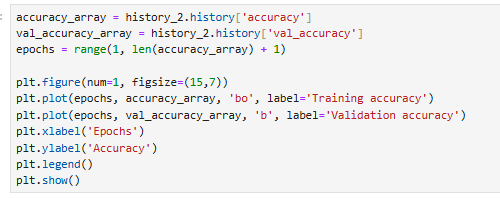

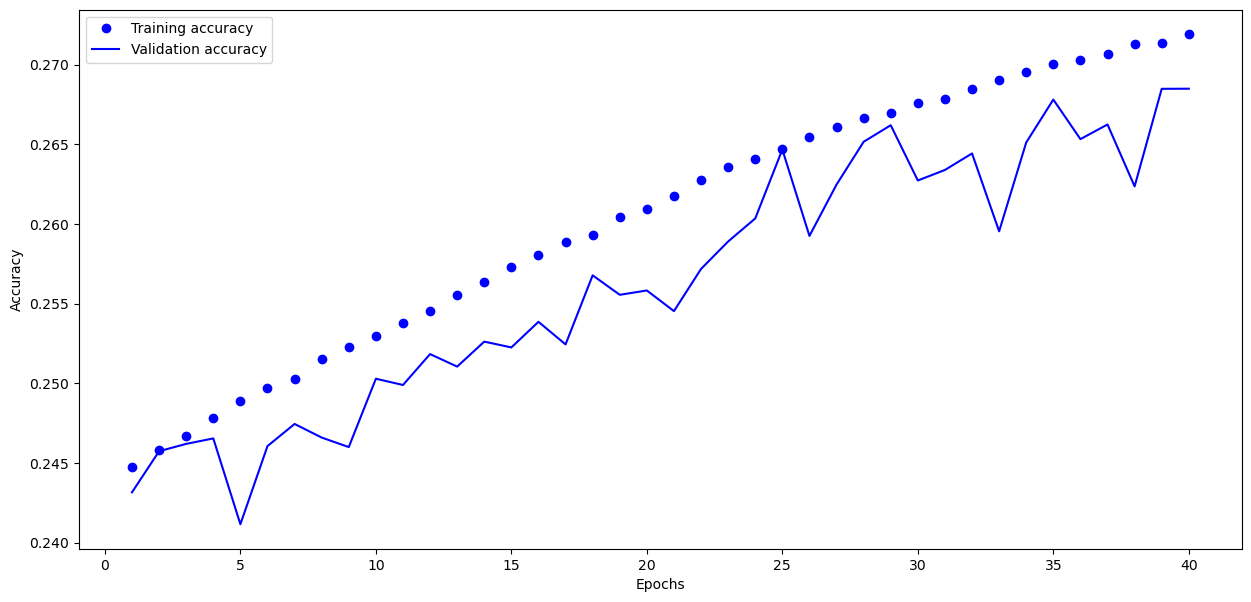

In [50]:

accuracy_array = history.history['accuracy']
val_accuracy_array = history.history['val_accuracy']
epochs = range(1, len(accuracy_array) + 1)

plt.figure(num=1, figsize=(15, 7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

______________________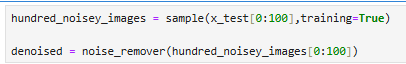

In [51]:
hundred_noisey_images = sample(x_test[0:100], training=True)

denoised = noise_remover(hundred_noisey_images[0:100])


______________________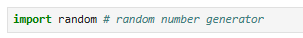

In [52]:
import random

0
The Original


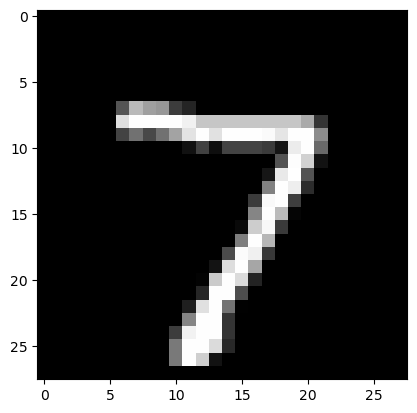

The Noisey Version


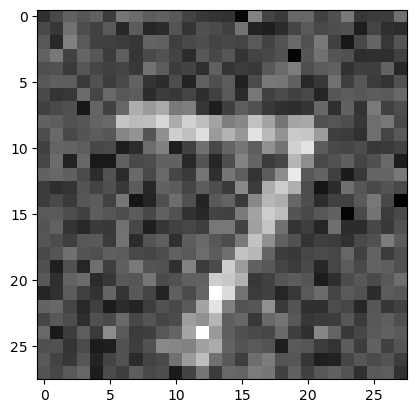

After going through denoiser


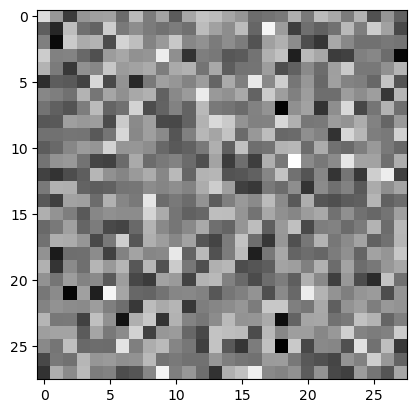

In [54]:
n = random.randint(0, 100)

print(n)

print("The Original")
plt.imshow(x_test[n])
plt.show()

print("The Noisey Version")
plt.imshow(hundred_noisey_images[n])
plt.show()

print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

_______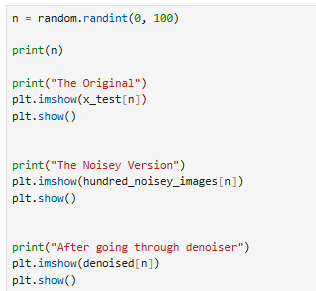

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

 - Put the Encoder, Decoder and Basic Autoencoder models using summary() in your lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present. Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.